<div align="center">
  <h1> EDA in Python</h1>
  <a class="header-badge" target="_blank" href="https://www.linkedin.com/in/s-ndegwa/">
  <img src="https://img.shields.io/badge/style--5eba00.svg?label=LinkedIn&logo=linkedin&style=social">
  </a>
  <a class="header-badge" target="_blank" href="https://twitter.com/TraplodWahome">
  <img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/TraplordWahome?style=social">
  </a>

<sub>Author:
<a href="https://www.linkedin.com/in/s-ndegwa/" target="_blank">Samuel Ndegwa</a><br>
<small>July, 2023</small>
</sub>
</div>

- Exploratory Data Analysis, or EDA for short, is the process of cleaning and reviewing data to derive insights such as descriptive statistics and correlation and generate hypotheses for experiments
- EDA results often inform the next steps for the dataset, whether that be generating hypotheses, preparing the data for use in a machine learning model, or even throwing the data out and gathering new data!
- We are going to utilize the pandas library to analyze our data

## Functions for initial Exploration

Import the required python package, in this case pandas as pd.

In [1]:
import pandas as pd # importing pandas as pd

To download the CSV file, what is needed in this example, console/command line is enough:

In [ ]:
curl -O https://raw.githubusercontent.com/Asabeneh/30-Days-Of-Python/master/data/weight-height.csv


**Inspecting a DataFrame**

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.<br>

- .head() returns the first few rows (the “head” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .describe() calculates a few summary statistics for each column.

In [ ]:
import pandas as pd

df = pd.read_csv('weight-height.csv')
print(df)

This line prints the DataFrame _df_ to the console. When you run this code, it will display the contents of the CSV file "weight-height.csv" in tabular form.

**Data Exploration**<br>
Let us read only the first 5 rows using head()

In [ ]:
print(df.head(10)) # give five rows we can increase the number of rows by passing argument to the head() method

- Use a pandas function to print a summary of column non-missing values and data types from the _df_ DataFrame.

In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB
None


**Explanation**<br>
The _info()_ function provides a concise summary of the DataFrame, including the number of non-null values in each column and the data types of those columns. It also gives information about the memory usage of the DataFrame.

- Print the summary statistics (count, mean, standard deviation, min, max, and quartile values) of each numerical column in unemployment.

In [ ]:

# Using the describe() function to get the summary statistics of numerical columns
summary_stats = df.describe()

# Printing the summary statistics
print(summary_stats)

**Types of Data in Statistics**
1. Numerical Data
    - This data has a sense of measurement involved in it; for example, a person's age, height, weight, blood pressure, heart rate, temperature, number of teeth, number of bones, and the number of family members. This data is often referred to as quantitative data in statistics. The numerical dataset can be either discrete or continuous types. 
2. Categorical data: <br>
    - This type of data represents the characteristics of an object; for example, gender, marital status, type of address, or categories of the movies. This data is often referred to as qualitative datasets in statistics. To understand clearly, here are some of the most common types of categorical data you can find in data:
        - Gender (Male, Female, Other, or Unknown)
        - Marital Status (Annulled, Divorced, Interlocutory, Legally Separated, Married, Polygamous, Never Married, Domestic Partner, Unmarried, Widowed, or Unknown)
        - Movie genres (Action, Adventure, Comedy, Crime, Drama, Fantasy, Historical, Horror, Mystery, Philosophical, Political, Romance, Saga, Satire, Science Fiction, Social, Thriller, Urban, or Western)
        - Blood type (A, B, AB, or O)

**Types of measurement scales in statistics**<br>
1. Norminal 
2. Ordinal 
3. Interval 
4. Ratio



**Counting categorical values**<br>
You'd now like to explore the categorical data contained in unemployment to understand the data that it contains related to each continent.

In [59]:
print(df['Gender'].value_counts())

Male      5000
Female    5000
Name: Gender, dtype: int64


**Explanation**<br>
The value_counts() function calculates the frequency of unique values in a Series (in this case, the 'Gender' column) and returns a new Series with the counts. The result will show the number of occurrences for each Gender in the 'df' DataFrame.

**A little bit of Visualization**<br>
1. We are going to use our unemployment dataset to view typical unemployment in a given year.
    - Our task in this exercise is to create a histogram showing the distribution of global unemployment rates in 2021.

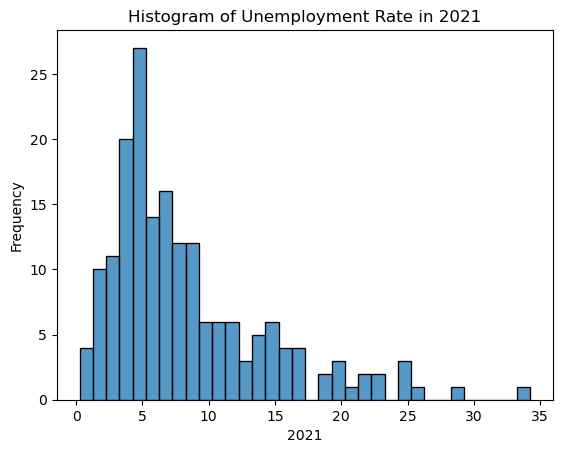

In [74]:
#import required python packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

unemployment = df = pd.read_csv('clean_unemployment.csv')

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(data=unemployment, x="2021", binwidth=1)

# Add labels and title
plt.ylabel('Frequency')
plt.title('Histogram of Unemployment Rate in 2021')
plt.show()

**Detecting Data types**<br>
Let us check the data types in our Unemployment DataFrame

In [ ]:
print(unemployment.info())

Change between data types

In [ ]:
#change our 2019 Column data type from float to integer
unemployment['2019'] = unemployment['2019'].astype(float)

print(unemployment.info())

**Data Validation using the _.isin_ function** <br>
The _.isin()_ function in Python is a powerful tool used in data validation to check whether elements in a Series or DataFrame column are present in a specified list or another DataFrame column. It returns a boolean Series or DataFrame, indicating whether each element in the Series or DataFrame column is found in the specified list or column.

**Example:**<br>
Using our **unemployment** dataframe, let us identify countries that are not in Oceania. <br>
These countries should return True while countries in Oceania should return False. This will set you up to use the results of .isin() to quickly filter out Oceania countries using Boolean indexing.
- Define a Series of Booleans describing whether or not each continent is outside of Oceania; call this Series not_oceania.

In [ ]:
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])

Summaries with .groupby and .agg
These functions are particularly useful when you want to calculate summary statistics for different groups in your dataset.

In [ ]:
import pandas as pd

df = pd.read_csv('weight-height.csv')
##height_weight_summary = df.groupby('Gender')['Weight', 'Height'].agg(['mean', 'std']) --previous way of indexing with multiple keys
height_weight_summary = df.groupby('Gender')[['Weight', 'Height']].agg(['mean', 'std'])
print(height_weight_summary)

**Example 2**<br>
Using our unemployment DataFrame;<br>
Print the mean and standard deviation of the unemployment rates for each year, grouped by continent.

In [ ]:
#Old method
print(unemployment.groupby("continent").agg(["mean", "std"]))

Print the mean and standard deviation of the unemployment rates for each year, without grouping.

In [ ]:
#import required python packages
import pandas as pd

unemployment = df = pd.read_csv('clean_unemployment.csv')

#get a concise summary of a DataFrame
##print(unemployment.info())
#drop columns that cannot be aggregated
#specify which columns to drop
columns_to_exclude = ['country_code', 'country_name']

#return a boolean array where True represents the columns that are not in columns_to_exclude
inverse_columns = df.loc[:, ~df.columns.isin(columns_to_exclude)]   #we use the .loc[] indexer to select the columns based on the boolean mask.

#print the mean and standard deviation of columns that can be aggregated
print(inverse_columns.groupby("continent").agg(["mean", "std"]))




**Named Aggregation**

Sometimes, it's helpful to name new columns when aggregating so that it's clear in the code output what aggregations are being applied and where<br>
In this example we are going to:
1. Create a DataFrame called continent_summary which shows a row for each continent. The DataFrame columns will contain the mean unemployment rate for each continent in 2021 as well as the standard deviation of the 2021 employment rate.
2. Rename the columns

In [ ]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021=("2021", "mean"),
    # Create the std_rate_2021 column
    std_rate_2021=("2021", "std")
)
print(continent_summary)

**Explanation**
1. **unemployment.groupby("continent"):** This part groups the "unemployment" DataFrame by the "continent" column, creating separate groups for each unique continent.
2. **.agg(...):** The .agg() function is used to perform aggregation on the grouped data.
3. **mean_rate_2021=("2021", "mean"):** This line creates a new column in the resulting DataFrame called "mean_rate_2021." It calculates the mean of the "2021" column within each continent group and stores the result in this new column.
4. **std_rate_2021=("2021", "std"):** Similarly, this line creates another new column called "std_rate_2021." It calculates the standard deviation of the "2021" column within each continent group and stores the result in this new column.

## Visualizing Categorical Summaries

- Seaborn has many great visualizations for exploration, including a bar plot for displaying an aggregated average value by category of data.
- In Seaborn, bar plots include a vertical bar indicating the 95% confidence interval for the categorical mean. Since confidence intervals are calculated using both the number of values and the variability of those values, they give a helpful indication of how much data can be relied upon.

In [ ]:
#import required python packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot of continents and their 2021 average unemployment
sns.barplot(data=unemployment, x="continent", y="2021")
plt.show()

## Data Manipulation with Pandas

**<h3>Sorting rows</h3>**
Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to .sort_values().

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.

Sort on …	Syntax
one column	df.sort_values("breed")
multiple columns	df.sort_values(["breed", "weight_kg"])

| Sort on … | Syntax|
|----------|----------|
|  one column  | df.sort_values("breed")|
|  multiple columns   |  df.sort_values(["breed", "weight_kg"])   |



By combining .sort_values() with .head(), you can answer questions in the form, "What are the top cases where…?".

**Sorting General Syntax** <br>
1. **sort_values():** This method is used to sort the DataFrame by the values of one or more columns. You can sort in ascending or descending order. By default, it sorts in ascending order. <br>
    Syntax: df.sort_values(by, ascending=True/False)
    - by: Specifies the column(s) to sort by. It can be a single column name or a list of column names if you want to sort by multiple columns.
    - ascending: Determines the sorting order. If True, the data will be sorted in ascending order; if False, it will be sorted in descending order.
2. **sort_index():** This method is used to sort the DataFrame based on the row index.<br>
    Syntax: df.sort_index(axis=0, ascending=True/False)
    - axis: Specifies whether to sort the rows (axis=0) or columns (axis=1). The default is axis=0 (sorting rows).
    - ascending: Determines the sorting order. If True, the data will be sorted in ascending order of the index; if False, it will be sorted in descending order.

**Example 1** <br>
Sort homelessness by the number of homeless individuals, from smallest to largest, and save this as homelessness_ind.<br>
Print the head of the sorted DataFrame.

In [2]:
import pandas as pd

homelessness = pd.read_csv('homelessness.csv')

# Sort homelessness by individuals
homelessness_ind = homelessness.sort_values("individuals")

# Print the top few rows
print(homelessness_ind.head(10))

    Unnamed: 0              region          state  individuals  \
50          50            Mountain        Wyoming        434.0   
34          34  West North Central   North Dakota        467.0   
7            7      South Atlantic       Delaware        708.0   
39          39         New England   Rhode Island        747.0   
45          45         New England        Vermont        780.0   
29          29         New England  New Hampshire        835.0   
41          41  West North Central   South Dakota        836.0   
26          26            Mountain        Montana        983.0   
48          48      South Atlantic  West Virginia       1021.0   
24          24  East South Central    Mississippi       1024.0   

    family_members  state_pop  
50           205.0     577601  
34            75.0     758080  
7            374.0     965479  
39           354.0    1058287  
45           511.0     624358  
29           615.0    1353465  
41           323.0     878698  
26           422.

**Example 2**<br>
Sort homelessness by the number of homeless family_members in descending order, and save this as homelessness_fam.<br>
Print the head of the sorted DataFrame.

In [ ]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members", ascending=False)

# Print the top few rows
print(homelessness_fam.head(10))

**Example 3**<br>
Sort homelessness first by region (ascending), and then by number of family members (descending). Save this as homelessness_reg_fam.<br>
Print the head of the sorted DataFrame.

In [ ]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region", "family_members"], ascending=[True, False])

# Print the top few rows
print(homelessness_reg_fam.head(15))

'''Data Structures in Python
1. DataFrame
2. List
3. Tuple
4. Dictionary
5. Set
'''


**<h3>Subsetting Columns</h3>**
In pandas, subsetting columns refers to selecting and extracting specific columns from a DataFrame. <br>
When working with data, you may not need all of the columns in your dataset.<br> 
Square brackets ([]) can be used to select only the columns that matter to you in an order that makes sense to you. To select only "col_a" of the DataFrame df, use<br>
_df["col_a"]_

In [ ]:
#To select "col_a" and "col_b" of df, use

df[["col_a", "col_b"]]

**Example 1**<br>


In [ ]:
'''Create a DataFrame called individuals that contains only the individuals column of homelessness.
Print the head of the result.'''

# Select the individuals column
individuals = homelessness["individuals"]

# Print the head of the result
print(individuals)

individuals.to_csv('individuals.csv', index=False)

In [8]:
'''Create a DataFrame called state_fam that contains only the state and family_members columns of homelessness, in that order.
Print the head of the result.'''

# Select the state and family_members columns
state_fam = homelessness[["state", "family_members"]]

# Print the head of the result
print(state_fam.head(10))

#fruits = ["banana", "mango", "orange", "apple", "pineaplle"]

                  state  family_members
0               Alabama           864.0
1                Alaska           582.0
2               Arizona          2606.0
3              Arkansas           432.0
4            California         20964.0
5              Colorado          3250.0
6           Connecticut          1696.0
7              Delaware           374.0
8  District of Columbia          3134.0
9               Florida          9587.0


In [15]:
'''Create a DataFrame called ind_state that contains the individuals and state columns of homelessness, in that order.
Print the head of the result.'''

# Select only the individuals and state columns, in that order
ind_state = homelessness[["individuals", "state"]]

# Print the head of the result
print(ind_state.head(10))

   individuals                 state
0       2570.0               Alabama
1       1434.0                Alaska
2       7259.0               Arizona
3       2280.0              Arkansas
4     109008.0            California
5       7607.0              Colorado
6       2280.0           Connecticut
7        708.0              Delaware
8       3770.0  District of Columbia
9      21443.0               Florida


**<h2>Subsetting rows</h2>**<br>
A large part of data science is about finding which bits of your dataset are interesting. One of the simplest techniques for this is to find a subset of rows that match some criteria. This is sometimes known as filtering rows or selecting rows.


**How to subset rows in Pandas**
1. Using Boolean Indexing
2. Using the _isin()_ method
3. Using the _query()_ method
4. Using the _loc_ or _iloc_ accessor

The most common is to use relational operators to return True or False for each row, then pass that inside square brackets as shown below

In [ ]:
dogs[dogs["height_cm"] > 60]

dogs[dogs["color"] == "tan"]



**<h4>Substet rows using Boolean Indexing</h2>**
You can filter for multiple conditions at once by using the "bitwise and" operator, &.

In [ ]:
dogs[(dogs["height_cm"] > 60) & (dogs["color"] == "tan")]

**Example 1**

In [23]:
'''Filter homelessness for cases where the number of individuals is greater than ten thousand, assigning to ind_gt_10k. 
View the printed result.'''

# Filter for rows where individuals is greater than 10000
#ind_gt_10k = homelessness[homelessness["individuals"] > 10000]
ind_fam_gt_10k = homelessness[(homelessness["individuals"] > 10000) & (homelessness["family_members"] > 2000)]

# See the result
print(ind_fam_gt_10k)

ind_fam_gt_10k.to_csv('ind_fam_gt_10k.csv', index=False)


    Unnamed: 0              region       state  individuals  family_members  \
4            4             Pacific  California     109008.0         20964.0   
9            9      South Atlantic     Florida      21443.0          9587.0   
32          32        Mid-Atlantic    New York      39827.0         52070.0   
37          37             Pacific      Oregon      11139.0          3337.0   
43          43  West South Central       Texas      19199.0          6111.0   
47          47             Pacific  Washington      16424.0          5880.0   

    state_pop  
4    39461588  
9    21244317  
32   19530351  
37    4181886  
43   28628666  
47    7523869  


**Example 2**

In [24]:
'''
Filter homelessness for cases where the USA Census region is "Mountain", assigning to mountain_reg. 
View the printed result.'''

# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness["region"] == "Mountain"]

# See the result
print(mountain_reg)

mountain_reg.to_csv('mountain_reg.csv', index=False)

    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
5            5  Mountain    Colorado       7607.0          3250.0    5691287
12          12  Mountain       Idaho       1297.0           715.0    1750536
26          26  Mountain     Montana        983.0           422.0    1060665
28          28  Mountain      Nevada       7058.0           486.0    3027341
31          31  Mountain  New Mexico       1949.0           602.0    2092741
44          44  Mountain        Utah       1904.0           972.0    3153550
50          50  Mountain     Wyoming        434.0           205.0     577601


**Example 3**

In [25]:
'''Filter homelessness for cases where the number of family_members is less than one thousand and the region is "Pacific", assigning to fam_lt_1k_pac. 
View the printed result.'''
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness["family_members"] < 1000) & (homelessness["region"] == "Pacific")]

# See the result
print(fam_lt_1k_pac)

fam_lt_1k_pac.to_csv('fam_lt_1k_pac.csv', index=False)

   Unnamed: 0   region   state  individuals  family_members  state_pop
1           1  Pacific  Alaska       1434.0           582.0     735139


**<h4>Subset rows by using .isin() method</h4>**<br>
You can use the isin() method to filter rows based on whether their values are present in a specified list.

**Example 1**

In [ ]:
'''
Filter homelessness for cases where the USA census region is "South Atlantic" or it is "Mid-Atlantic", assigning to south_mid_atlantic. 
View the printed result.'''

# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness["region"] == "South Atlantic") | (homelessness["region"] == "Mid-Atlantic")]

# See the result
print(south_mid_atlantic)


**Explanation**<br>
1. **homelessness["region"] == "South Atlantic":** This is a boolean expression that creates a boolean Series with True for rows where the value in the "region" column is equal to "South Atlantic" and False for all other rows.
2. **homelessness["region"] == "Mid-Atlantic":** Similarly, this boolean expression creates another boolean Series with True for rows where the value in the "region" column is equal to "Mid-Atlantic" and False for all other rows.
3. **(homelessness["region"] == "South Atlantic") | (homelessness["region"] == "Mid-Atlantic"):** The | operator performs element-wise OR operation between the two boolean Series created above. It results in a new boolean Series where each element represents the result of the OR operation for the corresponding rows.
4. **homelessness[(...) | (...)]:** This syntax uses the boolean Series from the previous step to subset the rows in the "homelessness" DataFrame. It selects rows where either of the conditions is True, meaning rows where the "region" is either "South Atlantic" or "Mid-Atlantic."
5. **south_mid_atlantic:** The result of the above subsetting operation is assigned to a new DataFrame called "south_mid_atlantic," which contains only the rows from the "homelessness" DataFrame where the region is "South Atlantic" or "Mid-Atlantic."
6. The code then prints the "south_mid_atlantic" DataFrame, which will display only the rows from the original "homelessness" DataFrame where the region is either "South Atlantic" or "Mid-Atlantic." This allows you to focus on and analyze data related to these specific regions.

**Example 2**

In [16]:
'''Filter homelessness for cases where the USA census state is in the list of Mojave states, canu, assigning to mojave_homelessness. 
View the printed result.'''
import pandas as pd
import matplotlib.pyplot as plt

homelessness = pd.read_csv("homelessness.csv")

# The Mojave Desert states
mojave_states = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(mojave_states)]

# See the result
print(mojave_homelessness)


    Unnamed: 0    region       state  individuals  family_members  state_pop
2            2  Mountain     Arizona       7259.0          2606.0    7158024
4            4   Pacific  California     109008.0         20964.0   39461588
28          28  Mountain      Nevada       7058.0           486.0    3027341
44          44  Mountain        Utah       1904.0           972.0    3153550


**<h4>Adding new Columns</h4>**
You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together or by changing their units.<br>
This is called transformation or feature engineering

**Example 1**

In [19]:
'''Add a new column to homelessness, named total, containing the sum of the individuals and family_members columns.'''

# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

'''Add another column to homelessness, named p_individuals, containing the proportion of homeless people in each state who are individuals.'''

# Add p_individuals col as proportion of total that are individuals
homelessness["p_individuals"] = (homelessness["individuals"] / homelessness["total"]) * 100

# See the result
print(homelessness.head())



   Unnamed: 0              region       state  individuals  family_members  \
0           0  East South Central     Alabama       2570.0           864.0   
1           1             Pacific      Alaska       1434.0           582.0   
2           2            Mountain     Arizona       7259.0          2606.0   
3           3  West South Central    Arkansas       2280.0           432.0   
4           4             Pacific  California     109008.0         20964.0   

   state_pop     total  p_individuals  
0    4887681    3434.0      74.839837  
1     735139    2016.0      71.130952  
2    7158024    9865.0      73.583376  
3    3009733    2712.0      84.070796  
4   39461588  129972.0      83.870372  


**What we have learnt**
1. Sorting rows
2. Subsetting columns
3. Subsetting rows
4. Adding new columns

**Exercise**<br>
You will answer the question " Which state has the highest number of homeless individuals per 10,000 people in the state?"<br><br>
    **Instructions**<br>
- Add a column to homelessness, indiv_per_10k, containing the number of homeless individuals per ten thousand people in each state.
- Subset rows where indiv_per_10k is higher than 20, assigning to high_homelessness.
- Sort high_homelessness by descending indiv_per_10k, assigning to high_homelessness_srt.
- Select only the state and indiv_per_10k columns of high_homelessness_srt and save as result. Look at the result.

**<h3>Summary Statistics</h3>**<br>
Summary statistics are exactly what they sound like - they summarize many numbers in one statistic.<br>
For example, mean, median, minimum, maximum, and standard deviation are summary statistics.<br>
 Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

In [35]:
import pandas as pd

sales = pd.read_csv('sales_subset.csv')

#print(sales.info())

# Print the mean of weekly_sales

print(sales["weekly_sales"].mean())

# Print the median of weekly_sales

print(sales["weekly_sales"].median())

23843.950148505668
12049.064999999999


**Summarizing dates**<br>
Summary statistics can also be calculated on date columns that have values with the data type datetime64.<br>
 Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example, minimum and maximum, which allow you to see what time range your data covers.

In [ ]:
#Syntax

import pandas as pd

# Assuming you have a DataFrame named df

# To find the maximum value in a specific column
max_value_column = df['column_name'].max()

# To find the minimum value in a specific column
min_value_column = df['column_name'].min()

print("Maximum value in column:", max_value_column)
print("Minimum value in column:", min_value_column)


In [ ]:
# Print the maximum of the date column
print(sales["date"].max())

# Print the minimum of the date column
print(sales["date"].min())

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

homelessness = pd.read_csv('homelessness.csv')
#print the head
highest_population_row = homelessness.nlargest(1, 'state_pop')

highest_population_state = highest_population_row['state'].values[0]
highest_population_region = highest_population_row['region'].values[0]

print(f"The state with the highest population is: {highest_population_state}")
print(f"The region with the highest population is: {highest_population_region}")

The state with the highest population is: California
The region with the highest population is: Pacific


**Dropping duplicates**<br>
Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times. <br>
In Pandas, you can use the drop_duplicates() function to remove duplicate rows from a DataFrame.<br>
 This function keeps the first occurrence of each duplicate row by default. Let's see some examples:

In [ ]:
#Dropping duplicates from a DataFrame with all columns

# Drop duplicates and keep the first occurrence
sales_no_duplicates = sales.drop_duplicates()

# Display the DataFrame after removing duplicates
print("\nDataFrame after dropping duplicates:")
print(sales_no_duplicates)

In [ ]:
'''Dropping duplicates based on specific columns;

1. Remove rows of sales with duplicate pairs of store and type and save as store_types and print the head.'''

# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types.head())

'''2. Remove rows of sales with duplicate pairs of store and department and save as store_depts and print the head.'''

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
print(store_depts.head())

'''
3. Subset the rows that are holiday weeks using the is_holiday column, and drop the duplicate dates, saving as holiday_dates.'''

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")

'''
4. Select the date column of holiday_dates, and print.'''

# Print date col of holiday_dates
print(holiday_dates["date"])

In [ ]:
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")
print(holiday_dates["date"])

In [ ]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
print(store_types.head())

**Counting Categorical Variables**<br>
In Python, you can count categorical variables using the Pandas library, which provides the value_counts() function.<br> 
This function is particularly useful when working with DataFrames and Series to count the occurrences of unique categorical values

In [5]:
# Count the number of stores of each type
store_counts = store_types["type"].value_counts()

print(store_counts)

A    11
B     1
Name: type, dtype: int64


In [4]:
# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)

print(store_props)

A    0.916667
B    0.083333
Name: type, dtype: float64


In [ ]:
# Count the number of each department number and sort
dept_counts_sorted = store_depts["department"].value_counts(sort=True)

print(dept_counts_sorted)

In [ ]:
# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts["department"].value_counts(ascending=True, normalize=True)
print(dept_props_sorted)



**Grouped Summaries**<br>
In Python, you can create grouped summaries of data using the Pandas library.<br>
Grouped summaries involve splitting the data into groups based on certain criteria and then applying summary functions (such as mean, sum, count, etc.) to each group.<br>
 Pandas provides the groupby() function to achieve this

In [38]:
'''Calculate the total weekly_sales over the whole dataset.'''
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()
print(sales_all)


256894718.89999998


In [40]:
'''Subset for type "A" stores, and calculate their total weekly sales'''

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

print(sales_A)

233716315.01


In [41]:
'''Do the same for type "B" and type "C" stores.'''

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

print(sales_B)

23178403.89


In [42]:
'''Do the same for type "B" and type "C" stores.'''

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()
print(sales_C)

0.0


In [43]:
'''Combine the A/B/C results into a list, and divide by sales_all to get the proportion of sales by type.
'''

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)



[0.9097747 0.0902253 0.       ]


In [44]:
'''Group sales by "type", take the sum of "weekly_sales", and store as sales_by_type.'''

# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

print(sales_by_type)

type
A    2.337163e+08
B    2.317840e+07
Name: weekly_sales, dtype: float64


In [45]:
'''Calculate the proportion of sales at each store type by dividing by the sum of sales_by_type. Assign to sales_propn_by_type.
'''

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [ ]:
'''Group sales by "type" and "is_holiday", take the sum of weekly_sales, and store as sales_by_type_is_holiday.'''

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type", "is_holiday"])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

In [47]:
'''Grouped summary using multiple summary functions'''

import pandas as pd

# Sample DataFrame
data = {
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'B', 'C', 'A'],
    'Value': [10, 20, 15, 25, 30, 12, 18, 22, 17]
}

df = pd.DataFrame(data)

# Group by 'Category' and calculate the mean, sum, and maximum of 'Value' for each group
grouped_summary = df.groupby('Category')['Value'].agg(['mean', 'sum', 'max'])

print("Grouped summary:")
print(grouped_summary)


Grouped summary:
               mean  sum  max
Category                     
A         13.500000   54   17
B         22.666667   68   30
C         23.500000   47   25


**Indexing in Pandas**<br>

Indexing in Pandas refers to the process of selecting subsets of data from a DataFrame or Series.<br>
Pandas provides various methods for indexing, allowing you to access specific rows, columns, or individual elements based on different criteria

**Setting and removing indexes**<br>
pandas allows you to designate columns as an index. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).

In [ ]:
import pandas as pd 
temperatures = pd.read_csv('temperatures.csv')

# Look at temperatures

print(temperatures)
print(temperatures.head())


In [ ]:
# Set the index of temperatures to city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind)

In [54]:
# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

          city  Unnamed: 0        date        country  avg_temp_c
0      Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
1      Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
2      Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
3      Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
4      Abidjan           4  2000-05-01  Côte D'Ivoire      27.547
...        ...         ...         ...            ...         ...
16495     Xian       16495  2013-05-01          China      18.979
16496     Xian       16496  2013-06-01          China      23.522
16497     Xian       16497  2013-07-01          China      25.251
16498     Xian       16498  2013-08-01          China      24.528
16499     Xian       16499  2013-09-01          China         NaN

[16500 rows x 5 columns]


In [ ]:
# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

**Subsetting with .loc[]**<br>
.loc[] is used for label-based indexing.<br>
This method accepts indexes as values
- When you pass it a single argument, it will take a subset of rows.
- The code for subsetting using .loc[] can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.

In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}

df = pd.DataFrame(data)
print(df)

# Label-based indexing: Access row by label (index) and column name
print(df.loc[1, 'Name'])  # Output: Bob

# Integer-based indexing: Access row by integer position and column name
print(df.iloc[1, 0])  # Output: Bob

# Slicing with .loc[] and .iloc[]
print(df.loc[1:2, 'Name':'Age'])  # Output: Bob and Charlie rows with 'Name' and 'Age' columns
print(df.iloc[1:3, 0:2])  # Output: Bob and Charlie rows with 'Name' and 'Age' columns


In [ ]:
print(df.loc[1:2, 'Name':'Age'])

In [ ]:
print(df.iloc[1:3, 0:2])

In [ ]:
# Label-based indexing: Access row by label (index) and column name
print(df.loc[1, 'Name'])  # Output: Bob

In [ ]:
import pandas as pd
homelessness = pd.read_csv('homelessness.csv')
#print(homelessness.head())

homelessness_2 = homelessness.iloc[1:6, 1:4]
print(homelessness_2)



In [ ]:
import pandas as pd
ng = pd.read_csv('ng2.csv', sep=',', skiprows=1)

print(ng.head())

ng_removed = ng.drop(ng.index[0:6])
print(ng_removed)

import pandas as pd

#import your first csv
#import your second csv
#subset your first dataframe
#subset your second dataframe

#combined_dataframe = pd.concat([df1, df2], axis=1)

## Data Visualization In Python using Matplotlib

Creating bar plots in Matplotlib is a straightforward way to visualize categorical data.><br>
 Matplotlib is a widely used plotting library in Python that provides flexible and customizable functionalities for creating various types of plots, including bar plots

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

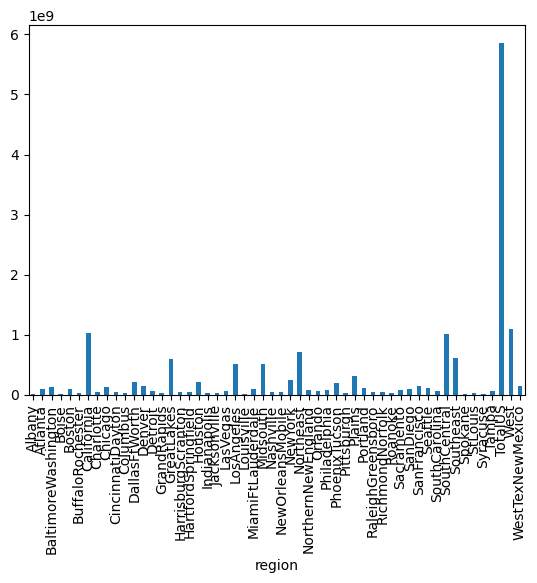

In [6]:
'''Create a bar plot of the number of avocados sold by size'''

# Import matplotlib.pyplot with alias plt
import pandas as pd
import matplotlib.pyplot as plt

avocados = pd.read_csv('avocado.csv')
# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_type = avocados.groupby("region")["Total Volume"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_type.plot(kind="bar")

# Show the plot
plt.show()

**Line Plots**<br>
Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one.<br>
 They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point.

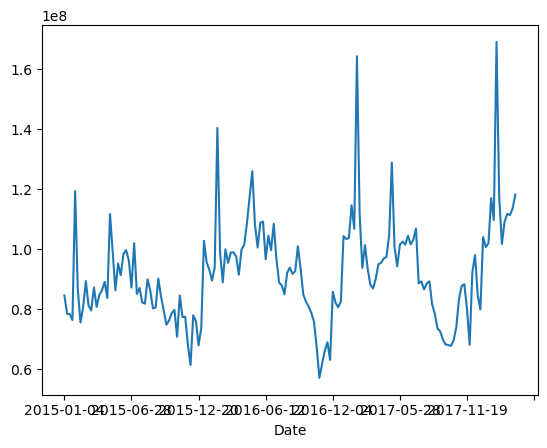

In [7]:
'''Create a line plot of the number of avocados sold.'''

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each year
nb_sold_by_date = avocados.groupby("Date")["Total Volume"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

**Scatter Plots**

Scatter plots are ideal for visualizing relationships between numerical variables.

**Example**<br>
 In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related.<br>
  If they're related, you may be able to use one number to predict the other.

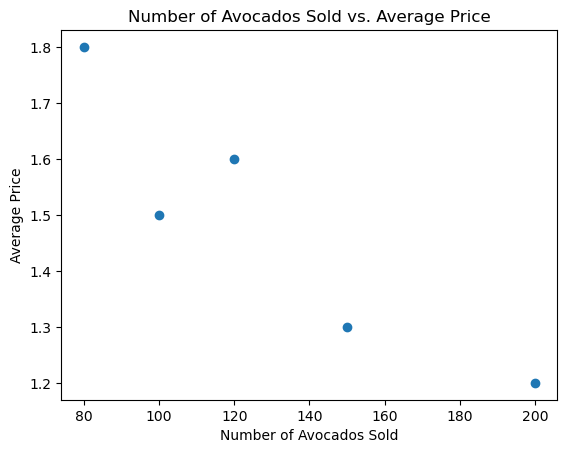

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

#DataFrame named 'avocados'
data = {
    'nb_sold': [100, 150, 80, 200, 120],
    'avg_price': [1.5, 1.3, 1.8, 1.2, 1.6]
}

avocados = pd.DataFrame(data)

# Scatter plot of avg_price vs. nb_sold with title
plt.scatter(avocados["nb_sold"], avocados["avg_price"])
plt.xlabel("Number of Avocados Sold")
plt.ylabel("Average Price")
plt.title("Number of Avocados Sold vs. Average Price")

# Show the plot
plt.show()


**Finding missing values**
Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.



In [ ]:
'''Print a DataFrame that shows whether each value in avocados_2016 is missing or not.
'''

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados.isna())


'''Print a summary that shows whether any value in each column is missing or not.'''

# Check each column for missing values
print(avocados_2016.isna().any())

# Count the number of missing values in each column
print(avocados.isna().sum())

'''Create a bar plot of the total number of missing values in each column.'''

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")


# Show plot
plt.show()

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

nigeria = pd.read_csv('ngdata.csv')

print(nigeria.isna().sum())



['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'Unnamed: 67']


**Removing missing values**
Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values

In [ ]:
'''Remove the rows of avocados_2016 that contain missing values and store the remaining rows in avocados_complete.'''

# Remove rows with missing values
avocados_complete = avocados_2016.dropna()


'''Verify that all missing values have been removed from avocados_complete. Calculate each column that has NAs and print.'''

# Check if any columns contain missing values
print(avocados_complete.isna().any())

**Replacing Missing Values**<br>
Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means.

In [ ]:
#find all columns with missing values and create a list
columns_with_missing = nigeria.columns[nigeria.isna().any()].tolist()

print(columns_with_missing)

# Fill in missing values with 0
nigeria_filled = nigeria.fillna(0)

print(nigeria_filled.head())

nigeria_filled.to_csv('nigeria_filled.csv', index=False)